#### Задача 1

Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.


#### ОТВЕТ:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame({'salary':[100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]}, columns= ['salary'])

In [3]:
mean_salary = df['salary'].sum()/df['salary'].count()
mean_salary

65.3

In [4]:
std_salary = (((df['salary'] - mean_salary)**2).sum()/df['salary'].count())**0.5
std_salary

30.823854398825596

In [5]:
var_shift = std_salary**2
var_shift

950.11

In [6]:
var_unbias = var_shift * (df['salary'].count() + 1)/df['salary'].count()
var_unbias

997.6155000000001

In [7]:
df['salary'].mean()

65.3

In [8]:
df['salary'].std()

31.624607341019814

In [9]:
df['salary'].var(ddof=0)

950.11

In [10]:
df['salary'].var(ddof=1)

1000.1157894736842

#### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

#### ОТВЕТ:

In [11]:
df['salary'].quantile([0.25, 0.75])

0.25    42.0
0.75    81.0
Name: salary, dtype: float64

In [12]:
inter_ = df['salary'].quantile(0.75) - df['salary'].quantile(0.25)
inter_

39.0

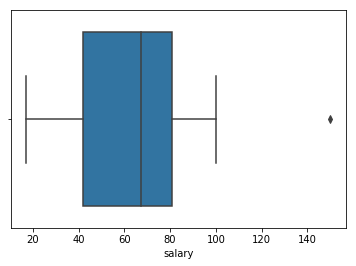

In [13]:
import seaborn as sns
sns.boxplot(df['salary'], orient='h')
plt.show()

In [14]:
low_boundary = df['salary'].quantile(0.25) - 1.5 * inter_
high_boundary = df['salary'].quantile(0.75) + 1.5 * inter_
(low_boundary, high_boundary)

(-16.5, 139.5)

In [15]:
out_ = df.loc[df['salary'] > high_boundary]
out_

,salary
19,150


#### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### ОТВЕТ:

Вероятность того, что наугад выбранный студент из группы А: $$P(A) = 1/4$$ из В: $$P(B) = 1/4$$ из С: $$P(C) = 2/4$$

Вероятность сдачи экзамена студентом из группы А: $$P(pass|A) = 0.8$$ из В: $$P(pass|B) = 0.7$$ из С: $$P(pass|C) = 0.9$$

Полная вероятность того, что студент сдал:

$$P(pass) = P(A) \cdot P(pass|A) + P(B) \cdot P(pass|B) + P(C) \cdot P(pass|C) = 0.25 \cdot 0.8 + 0.25 \cdot 0.7 + 0.5 \cdot 0.9 = 0.2 + 0.175 + 0.45 = 0.825$$

Тогда соответствующие вероятности, что сдавший экзамен студент из группы А, В или С соответственно:

$$ P(A|pass) = \frac{P(A) \cdot P(pass|A)} {P(pass)} = \frac{0.25 \cdot 0.8} {0.825} = 0.24242424242424246 $$

$$ P(B|pass) = \frac{P(B) \cdot P(pass|B)} {P(pass)} = \frac{0.25 \cdot 0.7} {0.825} = 0.21212121212121213 $$ 

$$ P(C|pass) = \frac{P(C) \cdot P(pass|C)} {P(pass)} = \frac{0.5 \cdot 0.9} {0.825} = 0.5454545454545455 $$